data from https://www.kaggle.com/mattiuzc/commodity-futures-price-history


# 데이터 준비

In [ ]:
!wget https://raw.githubusercontent.com/dhrim/deep_learning_data/master/google.csv

--2022-01-07 08:40:24--  https://raw.githubusercontent.com/dhrim/deep_learning_data/master/google.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 474929 (464K) [text/plain]
Saving to: ‘google.csv’

google.csv          100%[===================>] 463.80K  --.-KB/s    in 0.01s   

2022-01-07 08:40:24 (32.8 MB/s) - ‘google.csv’ saved [474929/474929]



# 파라매터 설정

In [ ]:
SEQUENCE_LENGTH = 30
OFFSET = 1
BATCH_SIZE = 32

# 데이터 로딩

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("google.csv")
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2004-08-19,51.835709,47.800831,49.813290,49.982655,44871361.0,49.982655
1,2004-08-20,54.336334,50.062355,50.316402,53.952770,22942874.0,53.952770
2,2004-08-23,56.528118,54.321388,55.168217,54.495735,18342897.0,54.495735
3,2004-08-24,55.591629,51.591621,55.412300,52.239197,15319808.0,52.239197
4,2004-08-25,53.798351,51.746044,52.284027,52.802086,9232276.0,52.802086


In [ ]:
print(len(df))

4317


# 결측치 처리

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4317 entries, 0 to 4316
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4317 non-null   object 
 1   High       4317 non-null   float64
 2   Low        4317 non-null   float64
 3   Open       4317 non-null   float64
 4   Close      4317 non-null   float64
 5   Volume     4317 non-null   float64
 6   Adj Close  4317 non-null   float64
dtypes: float64(6), object(1)
memory usage: 236.2+ KB


In [ ]:
df.isnull().sum()

Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

# 정렬 순서 확인

In [ ]:
df.sort_values(by=["Date"])

,Date,High,Low,Open,Close,Volume,Adj Close
0,2004-08-19,51.835709,47.800831,49.813290,49.982655,44871361.0,49.982655
1,2004-08-20,54.336334,50.062355,50.316402,53.952770,22942874.0,53.952770
2,2004-08-23,56.528118,54.321388,55.168217,54.495735,18342897.0,54.495735
3,2004-08-24,55.591629,51.591621,55.412300,52.239197,15319808.0,52.239197
4,2004-08-25,53.798351,51.746044,52.284027,52.802086,9232276.0,52.802086
...,...,...,...,...,...,...,...
4312,2021-10-05,2747.239990,2680.000000,2680.000000,2723.540039,1206300.0,2723.540039
4313,2021-10-06,2757.040039,2689.729980,2692.510010,2747.080078,988200.0,2747.080078
4314,2021-10-07,2803.089111,2771.260010,2777.260010,2783.709961,912500.0,2783.709961
4315,2021-10-08,2806.340088,2788.586914,2798.120117,2801.120117,946200.0,2801.120117


In [ ]:
sorted_index = df.sort_values(by=["Date"]).index

In [ ]:
print(sorted_index)
print(sorted_index - df.index)
print(sum(sorted_index - df.index))

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            4307, 4308, 4309, 4310, 4311, 4312, 4313, 4314, 4315, 4316],
           dtype='int64', length=4317)
Int64Index([0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            ...
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           dtype='int64', length=4317)
0


In [ ]:
print(df['Close'] - df['Adj Close'])
print(sum(df['Close'] - df['Adj Close']))

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4312    0.0
4313    0.0
4314    0.0
4315    0.0
4316    0.0
Length: 4317, dtype: float64
0.0


In [ ]:
df.drop(columns=["Date", "Adj Close"], inplace=True)

High


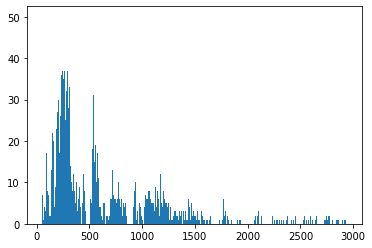

Low


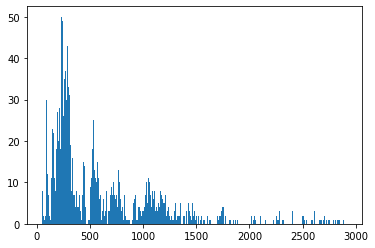

Open


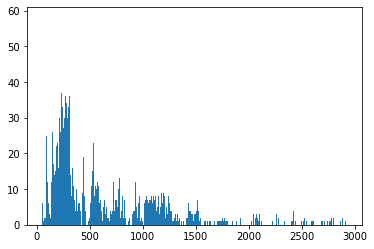

Close


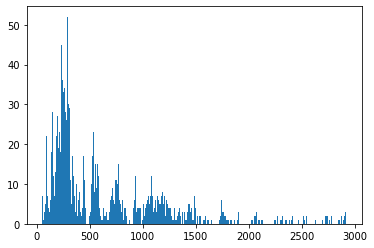

Volume


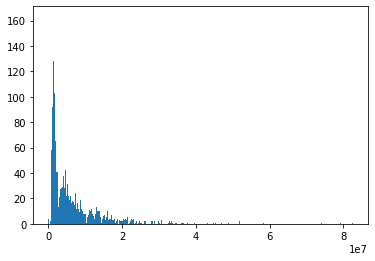

In [ ]:
for i in range(len(df.columns)):
    print(df.columns[i])
    plt.hist(df.iloc[:,i], bins=1000)
    plt.show()

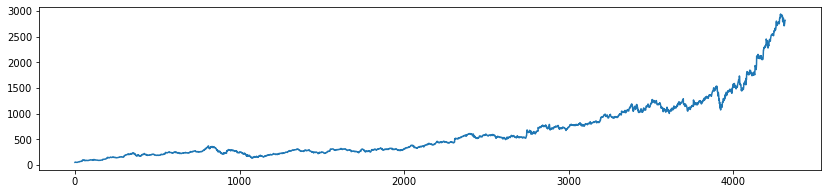

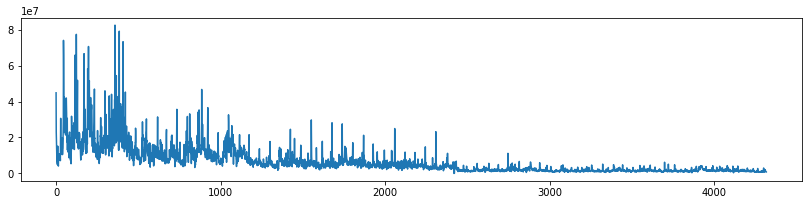

In [ ]:
plt.figure(figsize=(14,3))
plt.plot(df.iloc[:,0])
plt.show()

plt.figure(figsize=(14,3))
plt.plot(df.iloc[:,4])
plt.show()


In [ ]:
TARGET_COLUMN_INDEX = df.columns.get_loc("Close")
print(TARGET_COLUMN_INDEX)

3


In [ ]:
raw_data = df.to_numpy()
print(raw_data.shape)

(4317, 5)


In [ ]:
print(raw_data[:5])

[[5.18357086e+01 4.78008308e+01 4.98132896e+01 4.99826546e+01
  4.48713610e+07]
 [5.43363342e+01 5.00623550e+01 5.03164024e+01 5.39527702e+01
  2.29428740e+07]
 [5.65281181e+01 5.43213882e+01 5.51682167e+01 5.44957352e+01
  1.83428970e+07]
 [5.55916290e+01 5.15916214e+01 5.54123001e+01 5.22391968e+01
  1.53198080e+07]
 [5.37983513e+01 5.17460442e+01 5.22840271e+01 5.28020859e+01
  9.23227600e+06]]


# normalize

In [ ]:
maxs = raw_data.max(axis=0)
print(maxs)
mins = raw_data.min(axis=0)
print(mins)

[2.93640991e+03 2.91229004e+03 2.91898999e+03 2.91684009e+03
 8.25416310e+07]
[  50.68003845   47.80083084   49.40980148   49.81826782 7922.        ]


In [ ]:
normalized = (raw_data - mins) / (maxs - mins)
print(normalized[:5])

[[4.00477597e-04 0.00000000e+00 1.40608776e-04 5.73371113e-05
  5.43577158e-01]
 [1.26702635e-03 7.89503481e-04 3.15935047e-04 1.44208962e-03
  2.77885876e-01]
 [2.02655132e-03 2.27634211e-03 2.00670999e-03 1.63147253e-03
  2.22151352e-01]
 [1.70202714e-03 1.32337401e-03 2.09176891e-03 8.44405487e-04
  1.85522815e-01]
 [1.08059762e-03 1.37728336e-03 1.00161885e-03 1.04073783e-03
  1.11764685e-01]]


In [ ]:
preprocessed = normalized

# by Data Sampling

In [ ]:
numbers = preprocessed

In [ ]:
raw_x = []
raw_y = []

for i in range(len(numbers)):
  if i+SEQUENCE_LENGTH+OFFSET >= len(numbers): break
  raw_x.append(numbers[i:i+SEQUENCE_LENGTH,:])
  last_value = numbers[i+SEQUENCE_LENGTH-1,TARGET_COLUMN_INDEX]
  next_value = numbers[i+SEQUENCE_LENGTH+OFFSET-1,TARGET_COLUMN_INDEX]
  raw_y.append([ int(next_value > last_value) ])
#              0         1              
#              01234567890123456789
# numbers[3] = 12345678901234567890
#                 i = 3
#                 <-x->   = [3:8] = 45678
#              last_value = [8]   = 9
#              next_value = [9]   = 1
#                      y = (next_value>last_value) = (1>9) = False -> 0



In [ ]:
print(raw_x[0])
print(raw_y[0])

[[4.00477597e-04 0.00000000e+00 1.40608776e-04 5.73371113e-05
  5.43577158e-01]
 [1.26702635e-03 7.89503481e-04 3.15935047e-04 1.44208962e-03
  2.77885876e-01]
 [2.02655132e-03 2.27634211e-03 2.00670999e-03 1.63147253e-03
  2.22151352e-01]
 [1.70202714e-03 1.32337401e-03 2.09176891e-03 8.44405487e-04
  1.85522815e-01]
 [1.08059762e-03 1.37728336e-03 1.00161885e-03 1.04073783e-03
  1.11764685e-01]
 [1.07196682e-03 1.51292436e-03 9.99882712e-04 1.37259134e-03
  8.62762390e-02]
 [1.18762140e-03 1.69204068e-03 1.54669388e-03 1.06679918e-03
  7.55253226e-02]
 [6.47323247e-04 1.05209068e-03 1.05716738e-03 3.47491395e-04
  6.31690501e-02]
 [3.40060673e-04 1.07817641e-03 5.39866607e-04 4.10040245e-04
  5.97735163e-02]
 [2.12322448e-04 6.45166352e-04 6.09302925e-04 4.16992335e-05
  1.11151736e-01]
 [1.08750200e-04 5.18220153e-04 0.00000000e+00 2.60618879e-04
  1.83956388e-01]
 [0.00000000e+00 5.84301426e-04 3.05519533e-04 0.00000000e+00
  6.26290768e-02]
 [4.48804263e-05 6.34732326e-04 3.159350

In [ ]:
x = np.array(raw_x)
y = np.array(raw_y)
print(x.shape)
print(y.shape)

from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.1, shuffle=True)


print("Training Data:")
print(train_x.shape)
print(train_y.shape)

print("Test Data:")
print(test_x.shape)
print(test_y.shape)


(4286, 30, 5)
(4286, 1)
Training Data:
(3857, 30, 5)
(3857, 1)
Test Data:
(429, 30, 5)
(429, 1)


train_x[0]
 [[0.1667952  0.16764596 0.16714021 0.16733455 0.02723373]
 [0.16655698 0.16755031 0.16716278 0.16672295 0.02891691]
 [0.16651038 0.16603912 0.16739713 0.16583512 0.03330484]
 [0.16600805 0.16573653 0.16521683 0.16562315 0.04067239]
 [0.16610126 0.16590695 0.16528975 0.16647798 0.02888772]
 [0.16535555 0.1660965  0.16630178 0.16633202 0.0274794 ]
 [0.16714044 0.16765985 0.16848729 0.16850907 0.03465722]
 [0.16926538 0.16904062 0.16869558 0.16994595 0.03596581]
 [0.17099158 0.17036748 0.16959131 0.17107876 0.04499708]
 [0.17082068 0.170284   0.17154421 0.16979825 0.04154072]
 [0.16937412 0.16921104 0.17018499 0.16852469 0.03873625]
 [0.16822621 0.16727902 0.16946112 0.16693145 0.05250083]
 [0.16795002 0.16799549 0.16748219 0.16904942 0.03887002]
 [0.16899781 0.16910322 0.16901327 0.16850732 0.03725738]
 [0.1697211  0.16747902 0.16884487 0.17109439 0.05366591]
 [0.17093633 0.17096395 0.17039331 0.17134981 0.04041942]
 [0.17252098 0.17251513 0.17170044 0.17385174 0.07923707]
 [

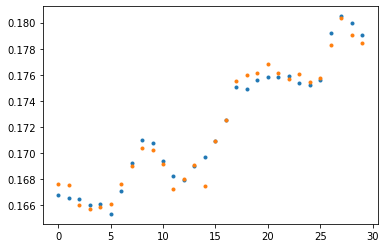

상승


In [ ]:
print("train_x[0]\n", train_x[0])
print()
print("train_y[0]\n", train_y[0])

plt.plot(train_x[0].T[0], '.')
plt.plot(train_x[0].T[1], '.')
# plt.plot([len(train_x[0])], train_y[0], 'x')
plt.show()
print("상승" if train_y[0]==1 else "하락")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               68608     
                                                                 
 flatten_1 (Flatten)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 68,866
Trainable params: 68,866
Non-trainable params: 0
_________________________________________________________________


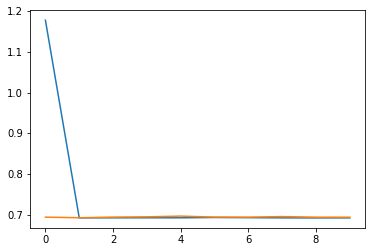

14/14 [==============================] - 0s 3ms/step - loss: 0.6935 - acc: 0.5198
loss= 0.6934603452682495
acc= 0.5198135375976562


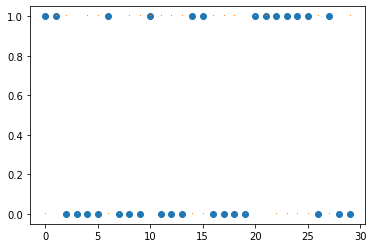

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

input_shape = train_x.shape[1:]

model = keras.Sequential()
model.add(LSTM(128, input_shape=input_shape))
model.add(Flatten())
model.add(Dense(2))
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["acc"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=0, validation_split=0.1, batch_size=BATCH_SIZE)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, acc = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)


y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=-1)
plt.plot(test_y[:30], 'o')
plt.plot(predicted[:30], '.')
plt.show()

# by Keras Sequence Data Generator

In [ ]:
from tensorflow.keras.utils import Sequence

class DataGenerator(Sequence):

    def __init__(self, numbers, 
                 sequence_length=SEQUENCE_LENGTH, 
                 offset=OFFSET, 
                 batch_size=BATCH_SIZE, 
                 shuffle=True,
                 validation_split=0.0,
                 test_split=0.0,
                 indexes=None):
        self.numbers = numbers
        self.sequence_length = sequence_length
        self.offset = offset
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.indexes, self.valid_indexes, self.test_indexes = self._prepare_indexes(validation_split, test_split, indexes)

    def __len__(self):
        return int(np.floor(len(self.indexes) / self.batch_size))

    def __getitem__(self, index):
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        return self._generate_data(indexes)

    def on_epoch_end(self):
        self._shuffle_index()

    def _prepare_indexes(self, validation_split, test_split, indexes):
        if indexes is not None:
            return indexes, None, None

        data_count = len(self.numbers) - (self.sequence_length+self.offset) + 1
        all_index = np.arange(data_count)
        np.random.shuffle(all_index)
        if validation_split+test_split==0.0:
            return all_index, None, None

        valid_i = int(len(all_index)*(1-validation_split-test_split))
        test_i = int(len(all_index)*(1-test_split))

        return all_index[:valid_i], all_index[valid_i:test_i], all_index[test_i:]
        
    def _shuffle_index(self):
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def _generate_data(self, indexes):
        X = np.empty((len(indexes), self.sequence_length, self.numbers.shape[-1]))
        Y = np.empty((len(indexes),))

        for i, index in enumerate(indexes):
            X[i] = self.numbers[index:index+self.sequence_length]
            last_value = self.numbers[index+self.sequence_length-1, TARGET_COLUMN_INDEX]
            next_value = self.numbers[index+self.sequence_length+self.offset-1, TARGET_COLUMN_INDEX]
            Y[i] = int(next_value > last_value)
        return X, Y

    def get_all_data(self):
        return self._generate_data(self.indexes)        

    def subset(self, type):
        if type=="train":
            return DataGenerator(self.numbers, indexes=self.indexes)
        elif type=="validation" or type=="valid":
            return DataGenerator(self.numbers, indexes=self.valid_indexes)
        elif type=="test":
            return DataGenerator(self.numbers, indexes=self.test_indexes)
        else:
            print("invalid type {}".format(type))

In [ ]:
data_generator = DataGenerator(preprocessed, validation_split=0.1, test_split=0.1)
train_data_generator = data_generator.subset("train")
valid_data_generator = data_generator.subset("valid")
test_data_generator = data_generator.subset("test")

batch_x, batch_y = train_data_generator.__getitem__(0)
print(batch_x.shape)
print(batch_y.shape)

(32, 30, 5)
(32,)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 128)               68608     
                                                                 
 flatten_2 (Flatten)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 2)                 258       
                                                                 
Total params: 68,866
Trainable params: 68,866
Non-trainable params: 0
_________________________________________________________________


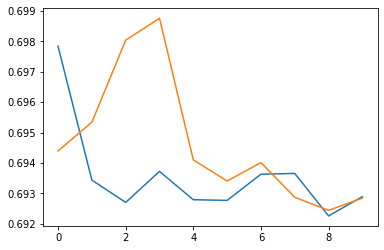

13/13 [==============================] - 0s 4ms/step - loss: 0.6923 - acc: 0.4904
loss= 0.6923303604125977
acc= 0.49038460850715637


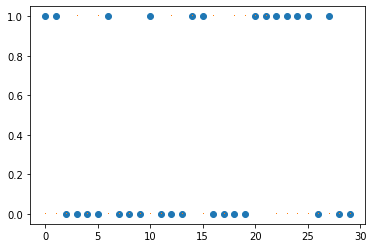

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

input_shape = train_x.shape[1:]

model = keras.Sequential()
model.add(LSTM(128, input_shape=input_shape))
model.add(Flatten())
model.add(Dense(2))
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["acc"])
model.summary()

history = model.fit(train_data_generator, epochs=10, verbose=0, validation_data=valid_data_generator)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)


y_ = model.predict(test_data_generator)
predicted = np.argmax(y_, axis=-1)
plt.plot(test_y[:30], 'o')
plt.plot(predicted[:30], '.')
plt.show()